In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('dataset/all_data.csv')

In [12]:
data.head(3)

,Course Absence Rate,PF,FIN,TOTAL,LG
0,0.03,0.92,0.36,70,C+
1,0.25,1.00,0.28,71,C+
2,0.29,0.90,0.10,58,D+


In [15]:
def class_type(total):
    if 75 <= total <= 100:
        class_type = 3
    elif 50 <= total < 75:
        class_type = 2
    else:
        class_type = 1
    return class_type

In [16]:
data['Class'] = data['TOTAL'].apply(lambda x: class_type(x))

In [19]:
data.to_csv('dataset/data_with_class.csv', index=False)

In [20]:
data

,Course Absence Rate,PF,FIN,TOTAL,LG,Class
0,0.03,0.92,0.36,70,C+,2
1,0.25,1.00,0.28,71,C+,2
2,0.29,0.90,0.10,58,D+,2
3,0.10,0.87,0.13,57,D+,2
4,0.10,0.85,0.10,55,D+,2
...,...,...,...,...,...,...
200,0.11,0.62,0.50,57,D+,2
201,0.07,0.50,1.00,70,C+,2
202,0.00,0.80,1.00,88,B+,3
203,0.04,0.87,1.00,92,A-,3


The dataset consists of the following columns:

- **Course Absence Rate**: Proportion of classes missed.
- **PF (Pre-final score)**: Score before the final exam.
- **FIN (Final exam score)**: Score on the final exam.
- **TOTAL**: Total score for the course.
- **LG (Letter Grade)**: Letter grade for the course.
- **Class**: Risk class indicating the student's performance level (1: Extremely unsatisfactory, 2: Undesirable, 3: Acceptable/Desirable).

### Exploratory Data Analysis (EDA)

1. **Statistical Summary**: Generate descriptive statistics for numerical columns.
2. **Missing Values**: Check for any missing values.
3. **Distribution Plots**: Visualize the distribution of each numerical feature.
4. **Correlation Analysis**: Analyze the correlation between features.
5. **Class Distribution**: Examine the distribution of the `Class` variable.
6. **Scatter Plots**: Create scatter plots to observe relationships between features and the target variable (`Class`).

In [22]:
data['TOTAL'] = data['TOTAL']/100

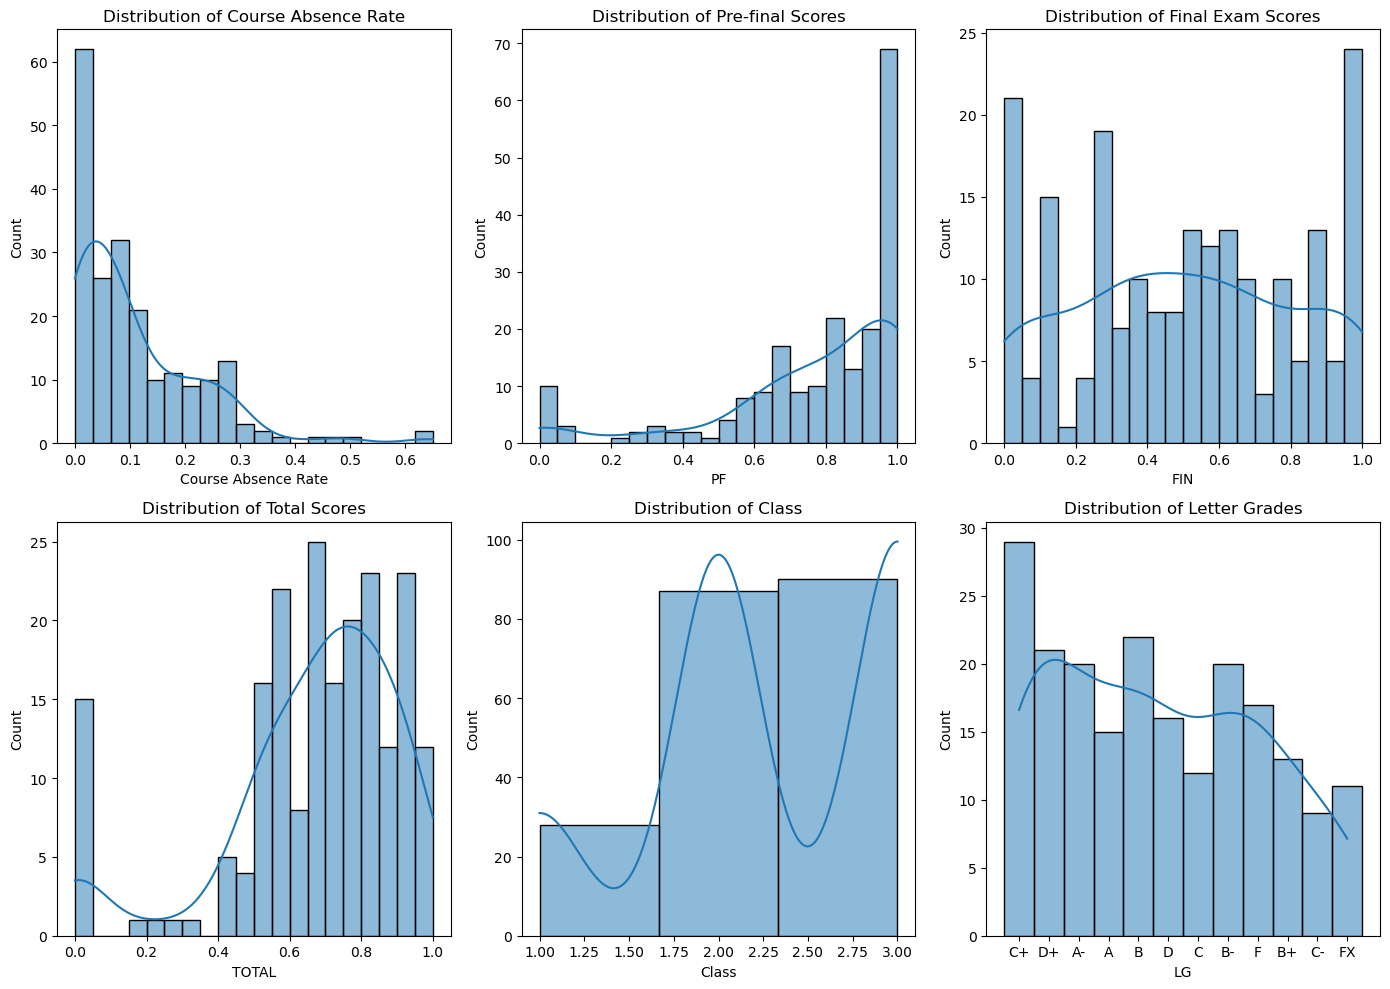

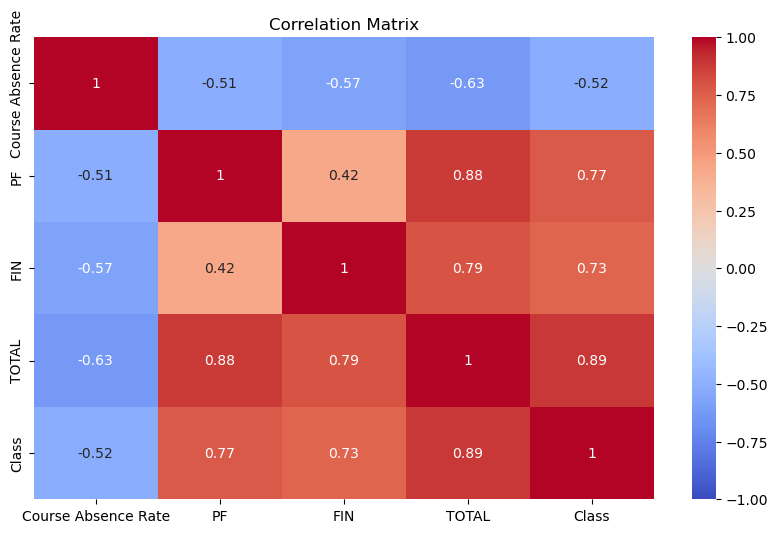

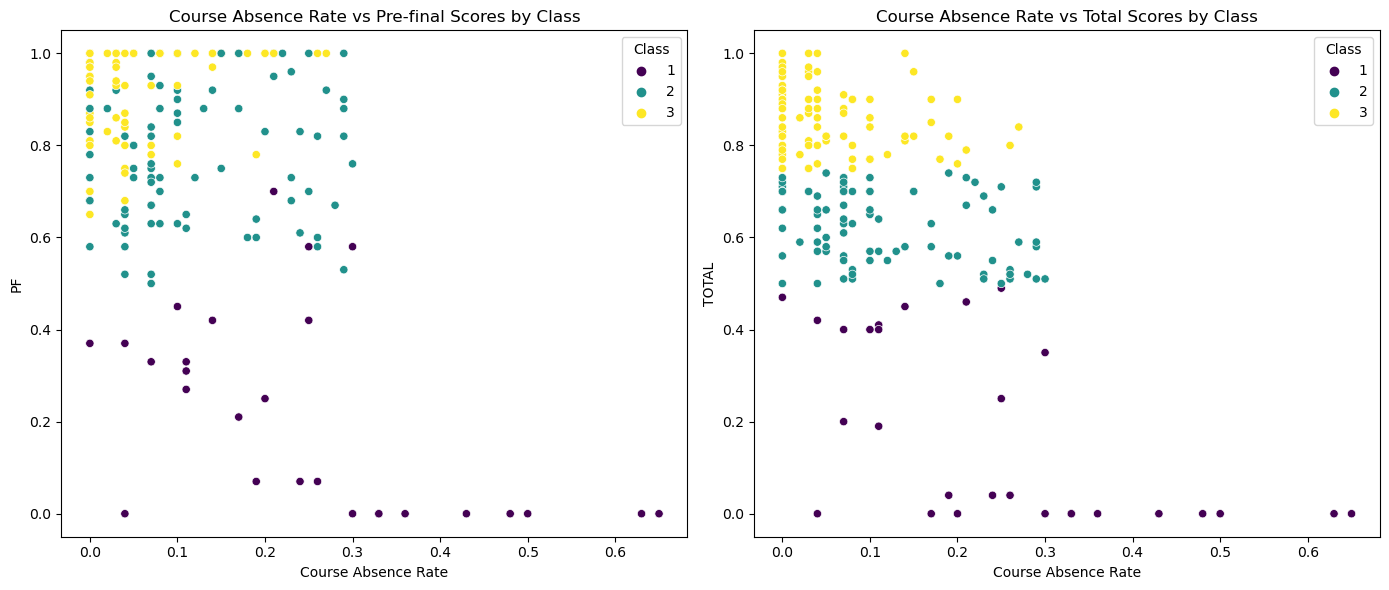

(       Course Absence Rate          PF         FIN       TOTAL       Class
 count           205.000000  205.000000  205.000000  205.000000  205.000000
 mean              0.107122    0.774878    0.505512    0.667415    2.302439
 std               0.115504    0.267987    0.317103    0.244732    0.697505
 min               0.000000    0.000000    0.000000    0.000000    1.000000
 25%               0.030000    0.670000    0.250000    0.560000    2.000000
 50%               0.070000    0.850000    0.500000    0.710000    2.000000
 75%               0.170000    1.000000    0.750000    0.840000    3.000000
 max               0.650000    1.000000    1.000000    1.000000    3.000000,
 Course Absence Rate    0
 PF                     0
 FIN                    0
 TOTAL                  0
 LG                     0
 Class                  0
 dtype: int64,
 3    90
 2    87
 1    28
 Name: Class, dtype: int64)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistical Summary
summary = data.describe()

# 2. Missing Values
missing_values = data.isnull().sum()

# 3. Distribution Plots
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.histplot(data['Course Absence Rate'], kde=True, bins=20)
plt.title('Distribution of Course Absence Rate')

plt.subplot(2, 3, 2)
sns.histplot(data['PF'], kde=True, bins=20)
plt.title('Distribution of Pre-final Scores')

plt.subplot(2, 3, 3)
sns.histplot(data['FIN'], kde=True, bins=20)
plt.title('Distribution of Final Exam Scores')

plt.subplot(2, 3, 4)
sns.histplot(data['TOTAL'], kde=True, bins=20)
plt.title('Distribution of Total Scores')

plt.subplot(2, 3, 5)
sns.histplot(data['Class'], kde=True, bins=3)
plt.title('Distribution of Class')

plt.subplot(2, 3, 6)
sns.histplot(data['LG'], kde=True, bins=20)
plt.title('Distribution of Letter Grades')

plt.tight_layout()
plt.show()

# 4. Correlation Analysis
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 5. Class Distribution
class_distribution = data['Class'].value_counts()

# 6. Scatter Plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Course Absence Rate', y='PF', hue='Class', data=data, palette='viridis')
plt.title('Course Absence Rate vs Pre-final Scores by Class')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Course Absence Rate', y='TOTAL', hue='Class', data=data, palette='viridis')
plt.title('Course Absence Rate vs Total Scores by Class')

plt.tight_layout()
plt.show()

summary, missing_values, class_distribution


### Summary of Exploratory Data Analysis (EDA)

1. **Statistical Summary**:
   - The dataset has 205 entries.
   - Course Absence Rate ranges from 0.00 to 0.65.
   - Pre-final (PF) and Final (FIN) scores range from 0.00 to 1.00.
   - Total scores range from 0 to 100.
   - Risk Classes are distributed as follows: 28 in Class 1, 87 in Class 2, and 90 in Class 3.

2. **Missing Values**:
   - No missing values in the dataset.

3. **Distribution Plots**:
   - Course Absence Rate: Most students have low absence rates.
   - Pre-final Scores: Most students score high on pre-final exams.
   - Final Scores: The scores are more uniformly distributed compared to pre-final scores.
   - Total Scores: The distribution shows a wide range of scores.
   - Class Distribution: Class 3 (Acceptable/Desirable) is the most common, followed by Class 2 (Undesirable), and then Class 1 (Extremely unsatisfactory).
   - Letter Grades: A variety of grades are present, with no single grade dominating.

4. **Correlation Analysis**:
   - Pre-final scores and Total scores have a strong positive correlation.
   - Course Absence Rate has a moderate negative correlation with both PF and Total scores.
   - The heatmap indicates that final scores (FIN) are less correlated with other scores.

5. **Class Distribution**:
   - Majority of the students fall into Class 3, followed by Class 2, and the least number in Class 1.

6. **Scatter Plots**:
   - Clear separation between classes is observed when plotting Course Absence Rate against PF and Total scores.
   - Higher absence rates tend to correspond with lower PF and Total scores, and these are more likely to belong to Class 1 or Class 2.


### Neural Network Model
We'll build a neural network model that predicts the risk class (1, 2, or 3) based on the Course Absence Rate and Pre-final scores (PF).


We'll use the following steps:
1. **Data Preprocessing**: Normalize the input features.
2. **Model Architecture**: Define the neural network structure.
3. **Training**: Train the model on the dataset.
4. **Evaluation**: Evaluate the model's performance.

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Step 1: Data Preprocessing

In [26]:
# Selecting features and target
X = data[['Course Absence Rate', 'PF']].values
y = data['Class'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train - 1, dtype=torch.long)  # Classes should be zero-indexed
y_test_tensor = torch.tensor(y_test - 1, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Step 2: Model Architecture

In [37]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 3)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

model = SimpleNN()

# Step 3: Training

In [38]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
train_losses = []
val_losses = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    
    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    val_losses.append(val_loss / len(test_loader))

# Step 4: Evaluation

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.71      0.75        17
           2       0.76      0.84      0.80        19

    accuracy                           0.80        41
   macro avg       0.85      0.85      0.85        41
weighted avg       0.81      0.80      0.80        41

Accuracy: 0.8048780487804879


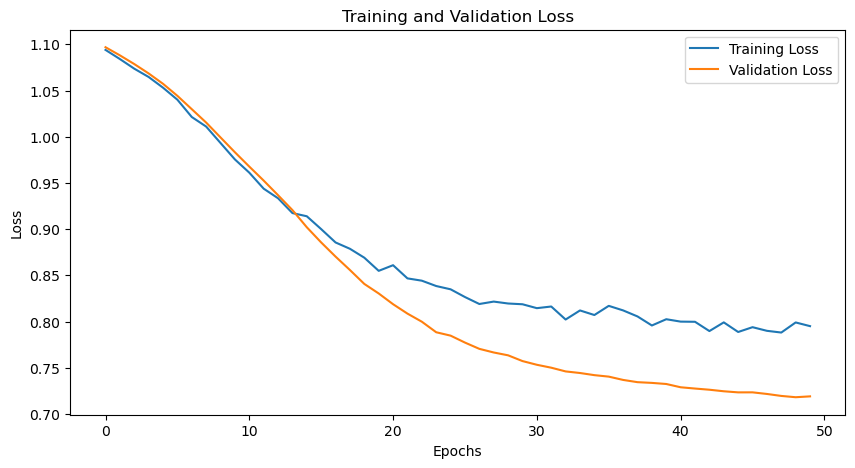

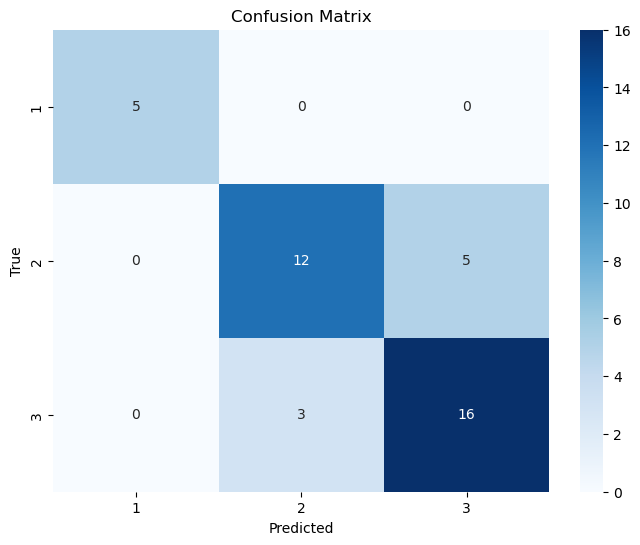

In [45]:
# Evaluate on test data
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(y_batch.numpy())

# Generating classification report
report = classification_report(all_labels, all_preds)
accuracy = accuracy_score(all_labels, all_preds)

print("Classification Report:\n", report)
print("Accuracy:", accuracy)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

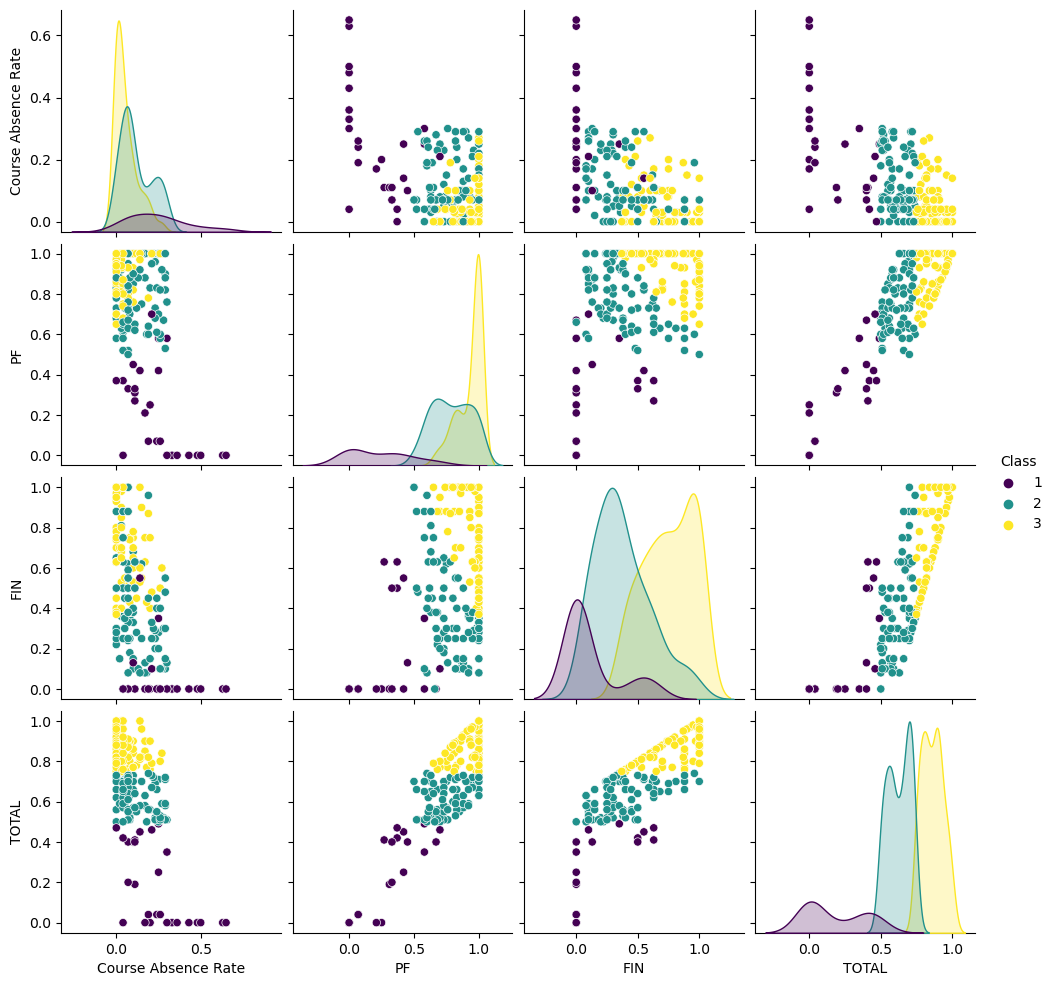

In [46]:
sns.pairplot(data, hue='Class', palette='viridis')
plt.show()

# Model Comparison

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()

# Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled, y_train)
log_reg_preds = log_reg.predict(X_test_scaled)
log_reg_acc = accuracy_score(y_test, log_reg_preds)

# Train and evaluate Random Forest
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, rf_preds)

# Train and evaluate SVM
svc.fit(X_train_scaled, y_train)
svc_preds = svc.predict(X_test_scaled)
svc_acc = accuracy_score(y_test, svc_preds)

print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(f"Random Forest Accuracy: {rf_acc}")
print(f"SVM Accuracy: {svc_acc}")


Logistic Regression Accuracy: 0.8048780487804879
Random Forest Accuracy: 0.8292682926829268
SVM Accuracy: 0.8048780487804879


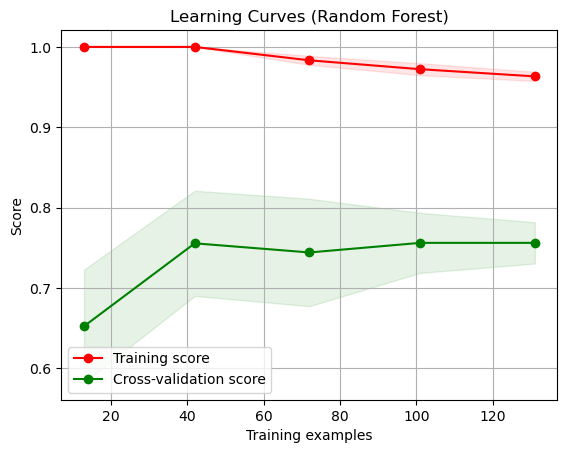

In [52]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Random Forest
plot_learning_curve(rf, "Learning Curves (Random Forest)", X_train_scaled, y_train, cv=5)
plt.show()


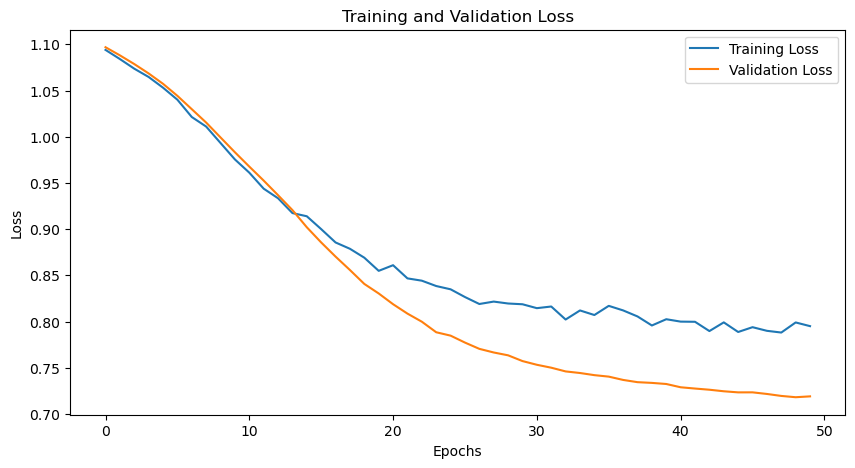

In [54]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [55]:
# Configure Auto-sklearn classifier
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=3600, per_run_time_limit=300, ensemble_size=50)

# Fit the model
automl.fit(X_train_scaled, y_train)

# Step 3: Evaluation

# Make predictions
y_pred = automl.predict(X_test_scaled)

# Generating classification report
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:\n", report)
print("Accuracy:", accuracy)

# Display the best models found by Auto-sklearn
print(automl.show_models())

NameError: name 'autosklearn' is not defined

In [56]:
# Function to train and evaluate model
def train_and_evaluate(activation_function, optimizer_type, layers):
    class SimpleNN(nn.Module):
        def __init__(self):
            super(SimpleNN, self).__init__()
            self.layers = nn.ModuleList()
            input_dim = 2
            for output_dim in layers:
                self.layers.append(nn.Linear(input_dim, output_dim))
                input_dim = output_dim
            self.output = nn.Linear(input_dim, 3)
            
        def forward(self, x):
            for layer in self.layers:
                x = activation_function(layer(x))
            x = torch.softmax(self.output(x), dim=1)
            return x

    model = SimpleNN()

    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_type(model.parameters(), lr=0.001)

    epochs = 50
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())

    report = classification_report(all_labels, all_preds)
    accuracy = accuracy_score(all_labels, all_preds)

    return accuracy, report

# Experiment configurations
configurations = [
    {'activation': torch.relu, 'optimizer': optim.Adam, 'layers': [16, 8]},
    {'activation': torch.relu, 'optimizer': optim.SGD, 'layers': [16, 8]},
    {'activation': torch.tanh, 'optimizer': optim.Adam, 'layers': [16, 8]},
    {'activation': torch.tanh, 'optimizer': optim.SGD, 'layers': [16, 8]},
    {'activation': torch.sigmoid, 'optimizer': optim.Adam, 'layers': [16, 8]},
    {'activation': torch.sigmoid, 'optimizer': optim.SGD, 'layers': [16, 8]},
    {'activation': torch.relu, 'optimizer': optim.Adam, 'layers': [32, 16, 8]},
    {'activation': torch.relu, 'optimizer': optim.SGD, 'layers': [32, 16, 8]}
]

# Running experiments and collecting results
results = []
for config in configurations:
    accuracy, report = train_and_evaluate(config['activation'], config['optimizer'], config['layers'])
    results.append({
        'Activation': config['activation'].__name__,
        'Optimizer': config['optimizer'].__name__,
        'Layers': config['layers'],
        'Accuracy': accuracy,
        'Report': report
    })

# Display results
for result in results:
    print(f"Configuration: Activation={result['Activation']}, Optimizer={result['Optimizer']}, Layers={result['Layers']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Classification Report:\n{result['Report']}")
    print("\n" + "="*80 + "\n")

C:\Users\LESKHAND\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LESKHAND\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LESKHAND\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LESKHAND\Anaconda3\lib\site-packages\

Configuration: Activation=relu, Optimizer=Adam, Layers=[16, 8]
Accuracy: 0.8048780487804879
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.71      0.75        17
           2       0.76      0.84      0.80        19

    accuracy                           0.80        41
   macro avg       0.85      0.85      0.85        41
weighted avg       0.81      0.80      0.80        41



Configuration: Activation=relu, Optimizer=SGD, Layers=[16, 8]
Accuracy: 0.4146341463414634
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.41      1.00      0.59        17
           2       0.00      0.00      0.00        19

    accuracy                           0.41        41
   macro avg       0.14      0.33      0.20        41
weighted avg       0.17      0.41      0.24        41



Confi

C:\Users\LESKHAND\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LESKHAND\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LESKHAND\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Selecting features and target
X = data[['Course Absence Rate', 'PF']]
y = data['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encoding the target variable
y_train_encoded = to_categorical(y_train - 1)  # subtracting 1 to make the classes zero-indexed
y_test_encoded = to_categorical(y_test - 1)

model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes for output
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, validation_split=0.2)

y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1) + 1  # converting back to the original class labels

# Generating classification report
report = classification_report(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)

print("Classification Report:\n", report)
print("Accuracy:", accuracy)


Epoch 1/50


C:\Users\LESKHAND\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2312 - loss: 1.1035 - val_accuracy: 0.3030 - val_loss: 1.1033
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4776 - loss: 1.0671 - val_accuracy: 0.3333 - val_loss: 1.0769
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5473 - loss: 1.0226 - val_accuracy: 0.4545 - val_loss: 1.0552
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6064 - loss: 0.9768 - val_accuracy: 0.4545 - val_loss: 1.0343
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6145 - loss: 0.9530 - val_accuracy: 0.4848 - val_loss: 1.0101
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5696 - loss: 0.9472 - val_accuracy: 0.4848 - val_loss: 0.9893
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5570 - loss: 0.9294 - val_accuracy: 0.4848 - val_loss: 0.9739
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6681 - loss: 0.8625 - val_accuracy: 0.4848 - val_loss: 0.9593
Ep

In [34]:
!python -m pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org tensorflow requests certifi

^C
